### Numpy basics

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [15]:
import numpy as np

m = np.arange(12).reshape((3,4))

for x in range(2):
    print(m.mean(axis=x))
    print(" ")
    
print(np.mean(m))

[4. 5. 6. 7.]
 
[1.5 5.5 9.5]
 
5.5


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [26]:
import numpy as np

u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

#1
t = np.outer(u, v)
print(t)

#2
t=np.ones((4, 4))
for x in range (4):
    for y in range (4):
        t[x, y]= u[x]*v[y]
print(t)   

#3
p = u.reshape(4, 1)
t = v*p
print(t)

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ 2.  4.  6.  8.]
 [ 6. 12. 18. 24.]
 [10. 20. 30. 40.]
 [14. 28. 42. 56.]]
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [32]:
import numpy as np
import numpy.random as npr

m = npr.rand(10, 6)
m[m<0.1] = -100
means = m.mean(axis=1)
for i in range(10):
    if means[i]<0:
        m[i,:]=0
#print(m)

4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

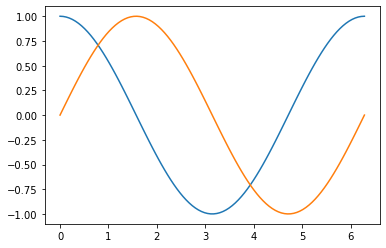

In [53]:
import numpy as np
import math as m
import matplotlib.pyplot as plt

a = np.linspace(0, 2*m.pi, 100)


b1 = a[0:99:10]

b2 = a[::-1]

mask = (abs(np.sin(a)-np.cos(a)) < 0.1)
b3 = a[mask]

plt.plot(a, np.cos(a))
plt.plot(a, np.sin(a))

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [75]:
import numpy as np

u = np.array(range(10))+1
v = np.array(range(10))+1

m = np.outer(u,v)

print(m.trace())

print(m[::-1].diagonal())

print(m.diagonal(1))

385
[10 18 24 28 30 30 28 24 18 10]
[ 2  6 12 20 30 42 56 72 90]


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [79]:
import numpy as np

u = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
v = u.reshape(10, 1)

miles = abs(u-v)
print(miles)
kms = m*1.60
print(kms)

[[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  977 1277 1346 1715 2250]
 [ 303  105    0  433  568  872 1172 1241 1610 2145]
 [ 736  538  433    0  135  439  739  808 1177 1712]
 [ 871  673  568  135    0  304  604  673 1042 1577]
 [1175  977  872  439  304    0  300  369  738 1273]
 [1475 1277 1172  739  604  300    0   69  438  973]
 [1544 1346 1241  808  673  369   69    0  369  904]
 [1913 1715 1610 1177 1042  738  438  369    0  535]
 [2448 2250 2145 1712 1577 1273  973  904  535    0]]
[[   0.   316.8  484.8 1177.6 1393.6 1880.  2360.  2470.4 3060.8 3916.8]
 [ 316.8    0.   168.   860.8 1076.8 1563.2 2043.2 2153.6 2744.  3600. ]
 [ 484.8  168.     0.   692.8  908.8 1395.2 1875.2 1985.6 2576.  3432. ]
 [1177.6  860.8  692.8    0.   216.   702.4 1182.4 1292.8 1883.2 2739.2]
 [1393.6 1076.8  908.8  216.     0.   486.4  966.4 1076.8 1667.2 2523.2]
 [1880.  1563.2 1395.2  702.4  486.4    0.   480.   590.4 1180.8 2036.8]
 [2360.  2043.2 1875.2 1182.4  

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [ ]:
import numpy as np
import timeit as t

start = t.default_timer()

N=100

a = np.array(range(N))
mask = np.array(range(N), dtype=bool)


for x in a:
    for i in range(2, x):
        if x % i == 0:
            mask[x] = False
            
finish = t.default_timer()

print(a[mask])
print(finish-start)

8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

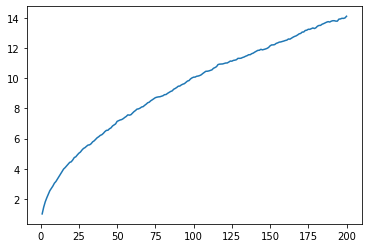

In [78]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

N=200

m = 2*npr.randint(0,2,size=(1000,N))-1

for i in range(1, N):
    m[:,i]+=m[:,i-1]

m=m**2

sqavg = np.mean(m, axis=0)
avg=np.sqrt(sqavg)

plt.plot(range(1, N+1), avg)

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

hares sum 715700.0
hares min 7600.0
hares argmin 17
hares mean 34080.95238095238
hares median 25400.0
hares std 20897.906458089667
lynxes sum 423500.0
lynxes min 4000.0
lynxes argmin 0
lynxes mean 20166.666666666668
lynxes median 12300.0
lynxes std 16254.591536908763
carrots sum 890400.0
carrots min 36700.0
carrots argmin 16
carrots mean 42400.0
carrots median 41800.0
carrots std 3322.5062255844787

1900 : carrots
1901 : carrots
1902 : hares
1903 : hares
1904 : lynxes
1905 : lynxes
1906 : carrots
1907 : carrots
1908 : carrots
1909 : carrots
1910 : carrots
1911 : carrots
1912 : hares
1913 : hares
1914 : hares
1915 : lynxes
1916 : carrots
1917 : carrots
1918 : carrots
1919 : carrots
1920 : carrots


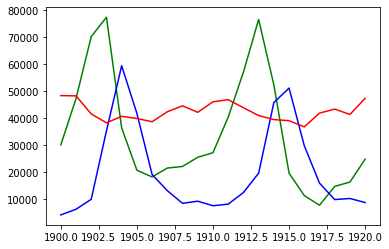

In [13]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("C:\\Users\Marcello\Desktop\py.txt")

year = data[:,0]
hares = data[:,1]
lynxes = data[:,2]
carrots = data[:,3]
names = ["year", "hares", "lynxes", "carrots"]

plt.plot(year, hares, 'g')
plt.plot(year, lynxes, 'b')
plt.plot(year, carrots, 'r')

for i in range (1, 4):
    for function in ['sum','min','argmin','mean','median','std']:
        print (names[i], function, getattr(np, function)(data[:,i]))

print("")
        
for i in range(21):
    if ((data[i, 1] >= data[i, 3]) & (data[i, 1] >= data[i, 2])):
        print(1900+i, ": hares")
    elif ((data[i, 2] >= data[i, 3])):
        print(1900+i, ": lynxes")
    else:
        print(1900+i, ": carrots")